In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

sns.set(style="whitegrid")
diabetes_data = pd.read_csv(r'C:\Users\mahmo\Downloads\diabetes.csv')

1. Identify Attribute Types:

In [21]:
# Check data types of each attribute
print("Attribute Types:")
print(diabetes_data.dtypes)
print ("\n")
# Infer attribute types (Nominal, Ordinal, Interval, Ratio)
for column in diabetes_data.columns:
    print(f"Attribute: {column}")
    if diabetes_data[column].dtype == 'object':
        print("Type: Nominal (Categorical)")
    elif diabetes_data[column].dtype in ['int64', 'float64']:
        unique_values = diabetes_data[column].nunique()
        if unique_values < 10:
            print("Type: Ordinal (Ordered Categories)")
        else:
            print("Type: Ratio (Continuous Data)")
    else:
        print("Type: Other")
    print()

Attribute Types:
Pregnancies                       int64
Glucose                           int64
BloodPressure                     int64
SkinThickness                     int64
Insulin                           int64
BMI                             float64
DiabetesPedigreeFunction        float64
Age                               int64
Outcome                           int64
Age_Width_Binned                  int64
BMI_Depth_Binned                float64
Glucose_MinMax                  float64
BMI_MinMax                      float64
BloodPressure_MinMax            float64
Glucose_Log                     float64
BMI_Log                         float64
BloodPressure_Log               float64
Glucose_Z                       float64
BMI_Z                           float64
BloodPressure_Z                 float64
Age_Category                   category
Insulin_Filled_Mean               int64
SkinThickness_Filled_Median       int64
Insulin_Filled_KNN              float64
SkinThickness_Filled_KN

##### (2). Summarize Attribute Statistics:

In [3]:
#  Provide detailed statistical summaries for each attribute:
statistics = diabetes_data.describe().T

# skewness and kurtosis
statistics['skewness'] = diabetes_data.skew()
statistics['kurtosis'] = diabetes_data.kurtosis()

print(statistics)


                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  skewness  kurtosis  
Pregnancies                 3.0000    6.00000   17.00  0.901674  0.159220  
Glucose                   117.0000  140.25000  199.00  0.173754  0.640780  
B

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

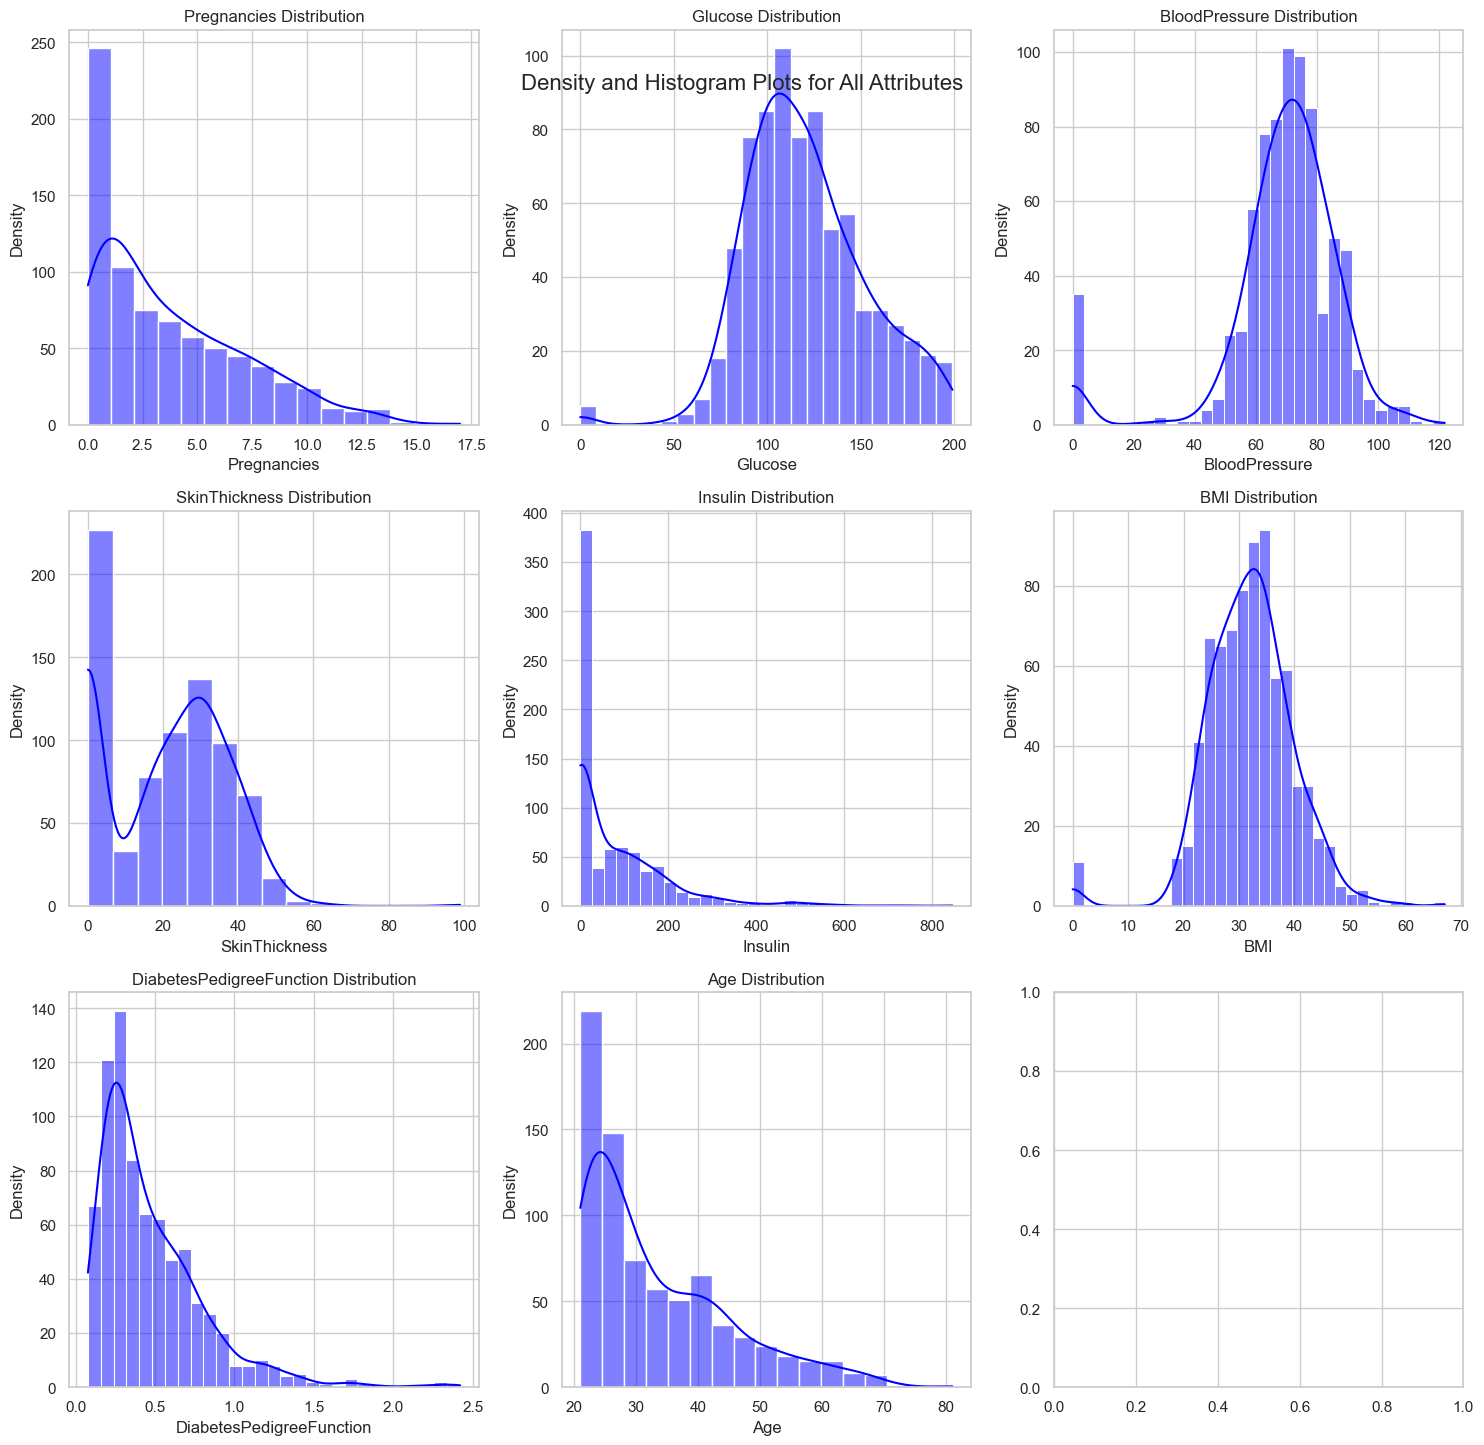

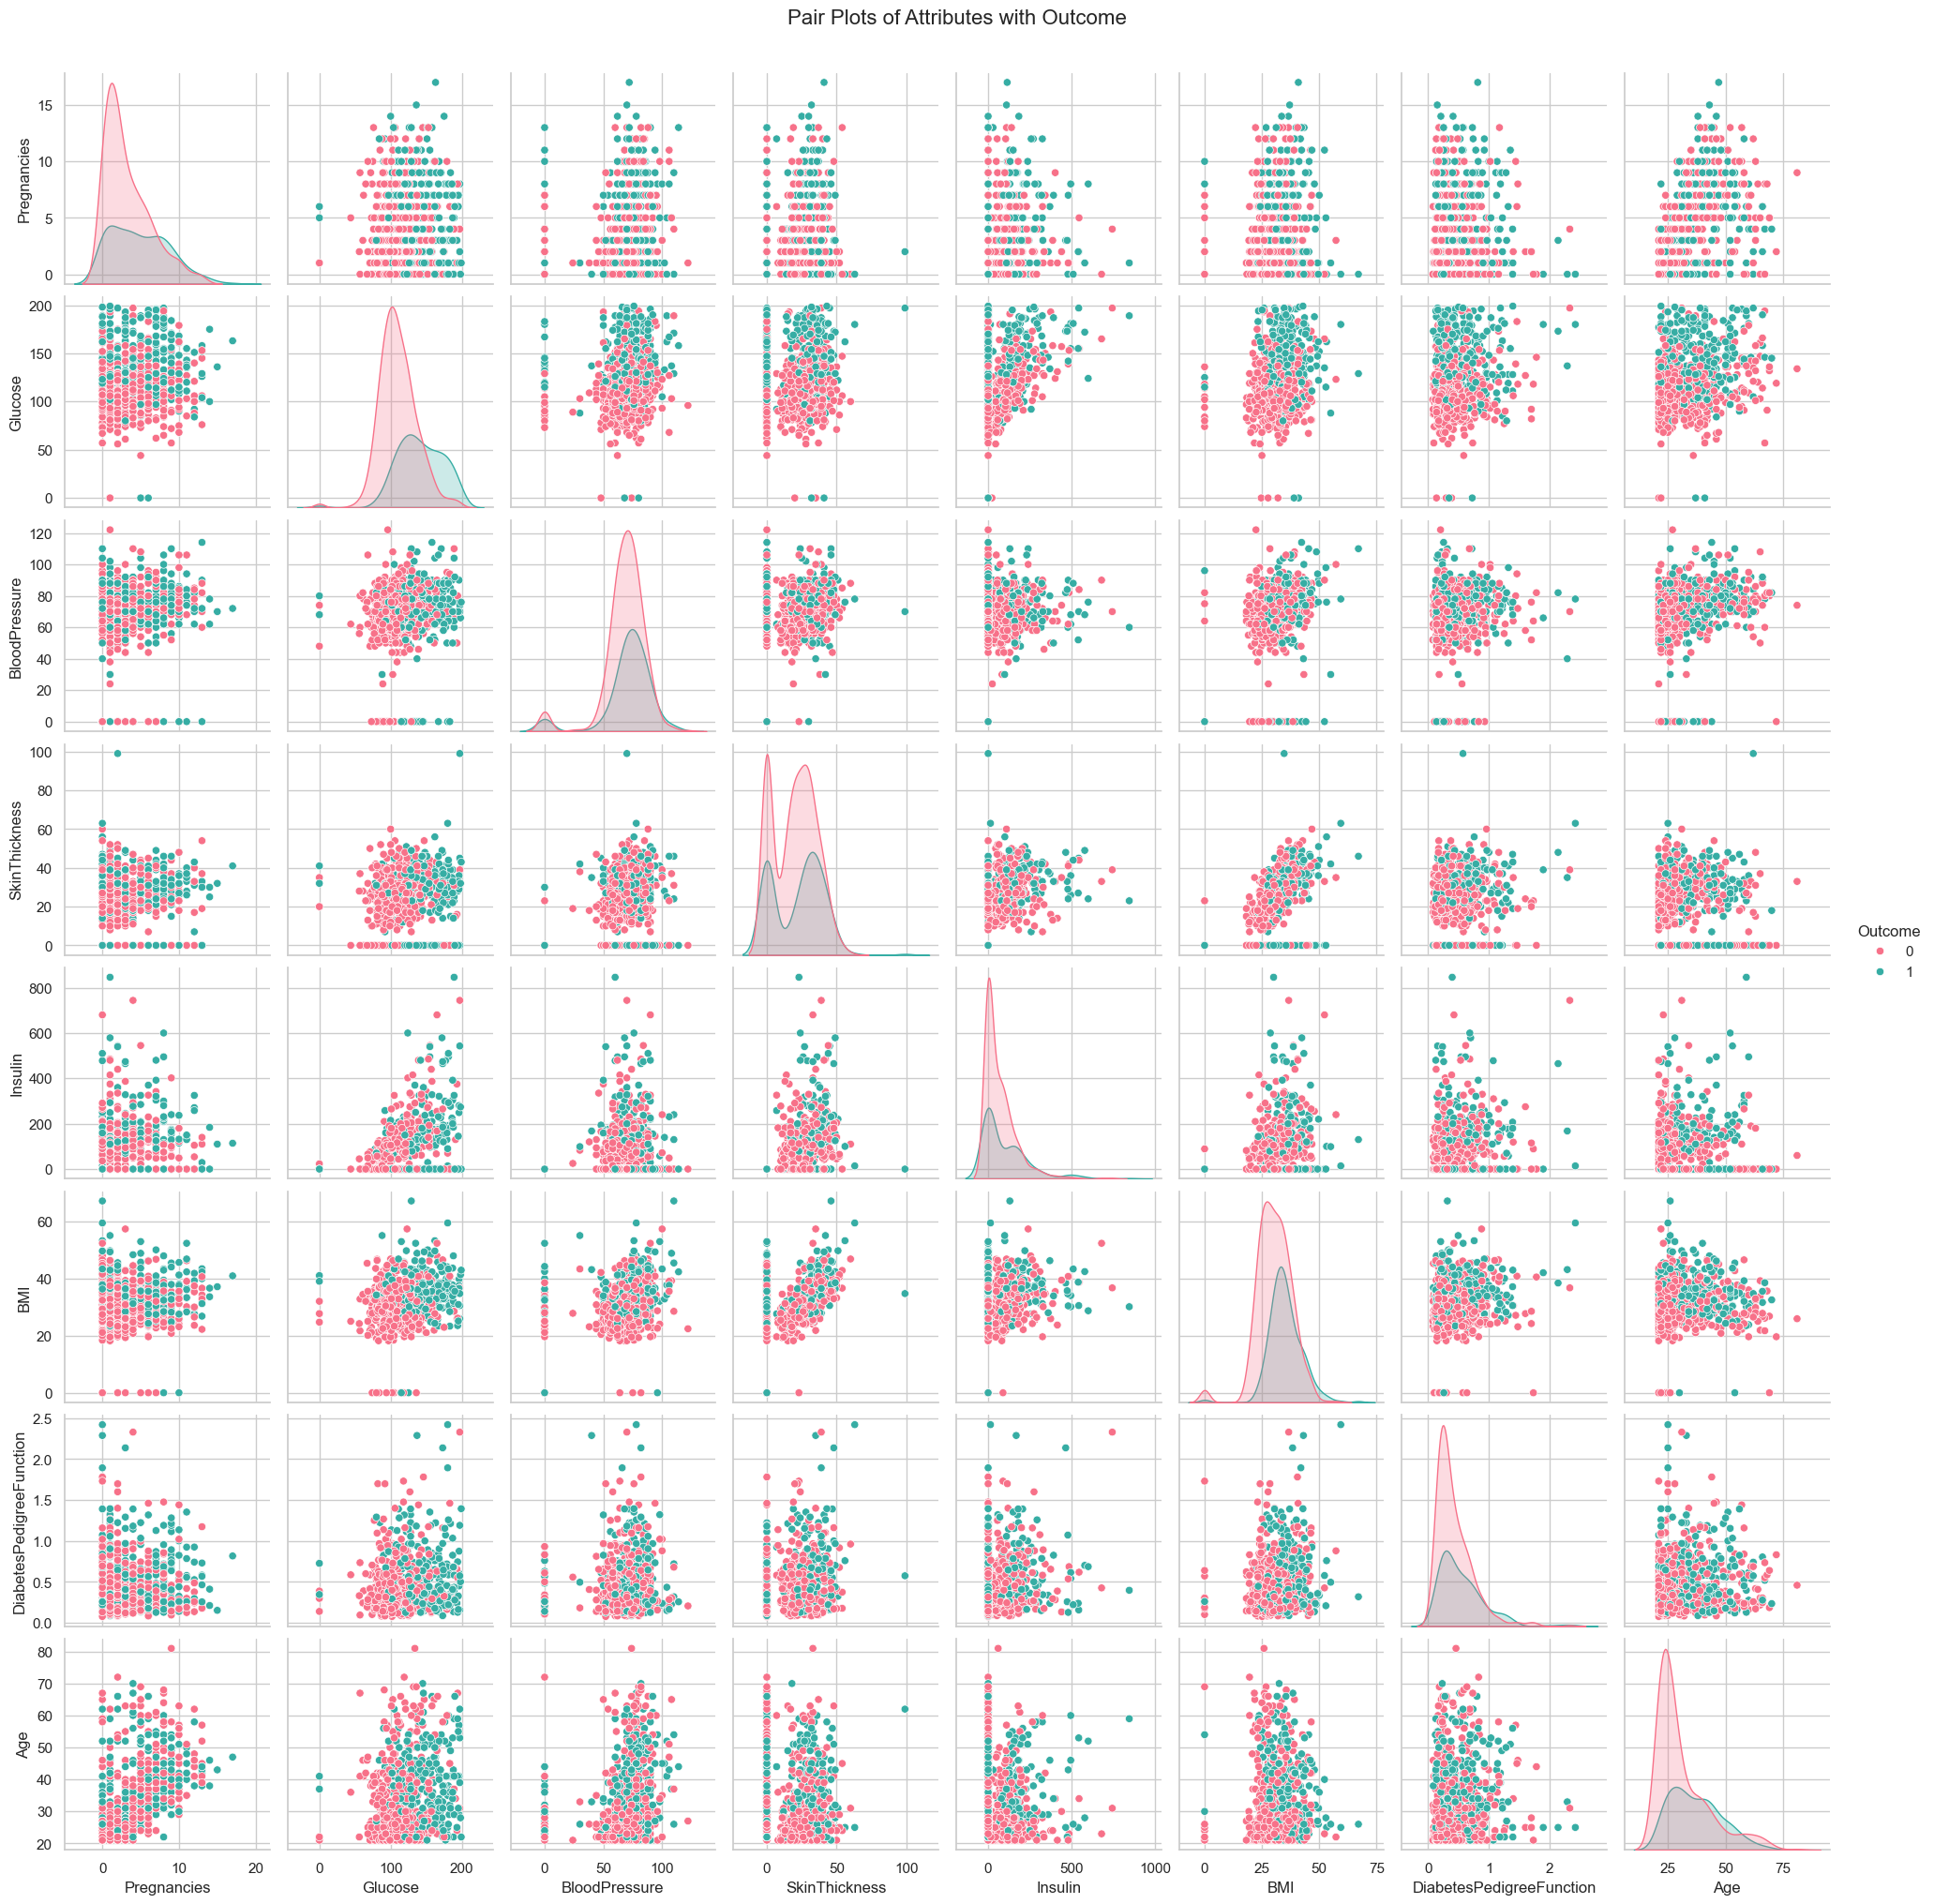

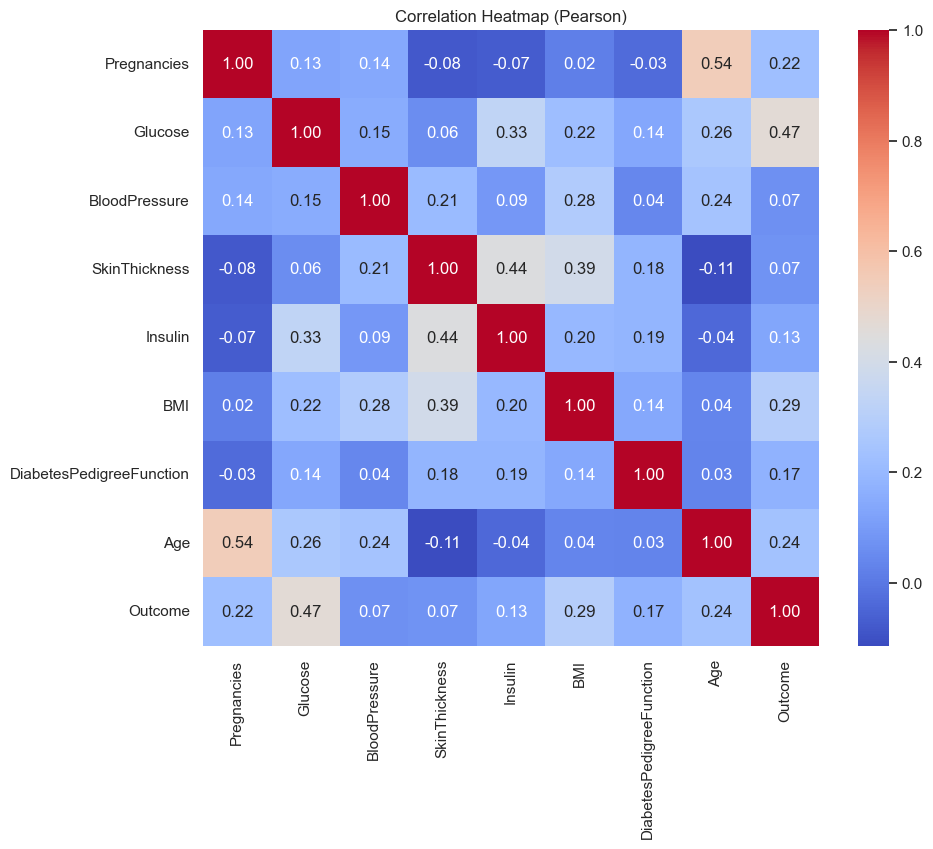

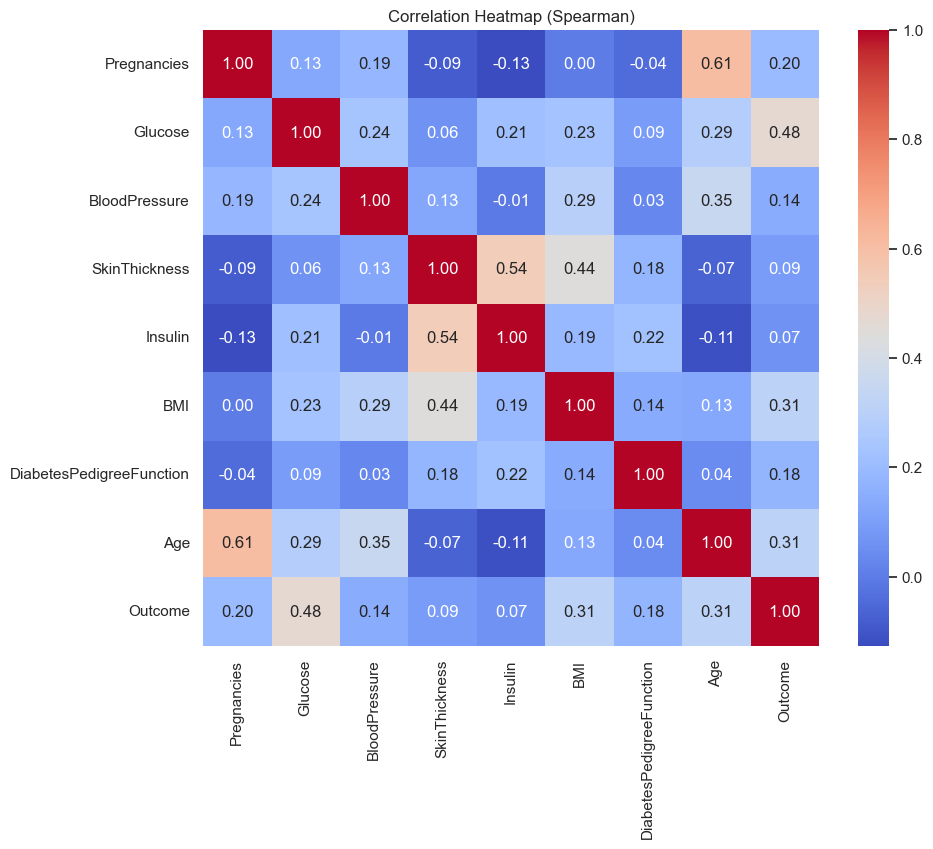

In [5]:
# Visualizations:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#  1. attribute  distributions
columns = diabetes_data.columns[:-1]  # استثناء عمود Outcome
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle("Density and Histogram Plots for All Attributes", fontsize=16, y=0.92)

for i, col in enumerate(columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(diabetes_data[col], kde=True, ax=ax, color="blue")
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

#  2. pair plots 
sns.pairplot(diabetes_data, hue="Outcome", diag_kind="kde", palette="husl")
plt.suptitle("Pair Plots of Attributes with Outcome", y=1.02, fontsize=16)
plt.show()

#3.correlation heatmaps
# Pearson Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(method="pearson"), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap (Pearson)")
plt.show()

# Spearman Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(method="spearman"), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap (Spearman)")
plt.show()


##### 3. Outlier Analysis and Feature Relationships:


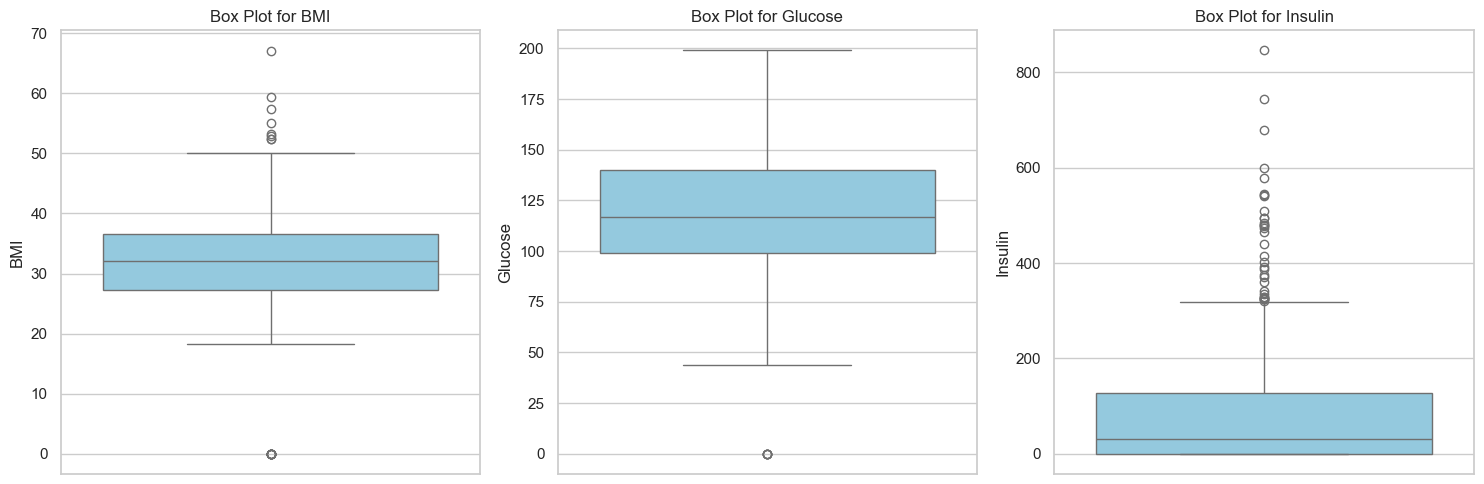

Outliers in BMI: [  9  49  60  81 145 177 371 426 445 494 522 673 684 706]
Outliers in Glucose: [ 75 182 342 349 502]
Outliers in Insulin: [  8  13 111 153 186 220 228 247 286 370 409 415 486 584 645 655 695 753]


In [ ]:
# 1.Identify outliers in attributes such as BMI, Glucose, and Insulin:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


features_to_analyze = ["BMI", "Glucose", "Insulin"]

#Box Plots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_analyze):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=diabetes_data[feature], color="skyblue")
    plt.title(f"Box Plot for {feature}")
plt.tight_layout()
plt.show()
# Z-Score 
from scipy.stats import zscore

outliers = {}
threshold = 3 # standard deviations
for feature in features_to_analyze:
    z_scores = zscore(diabetes_data[feature])
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    outliers[feature] = outlier_indices


for feature, indices in outliers.items():
    print(f"Outliers in {feature}: {indices}")

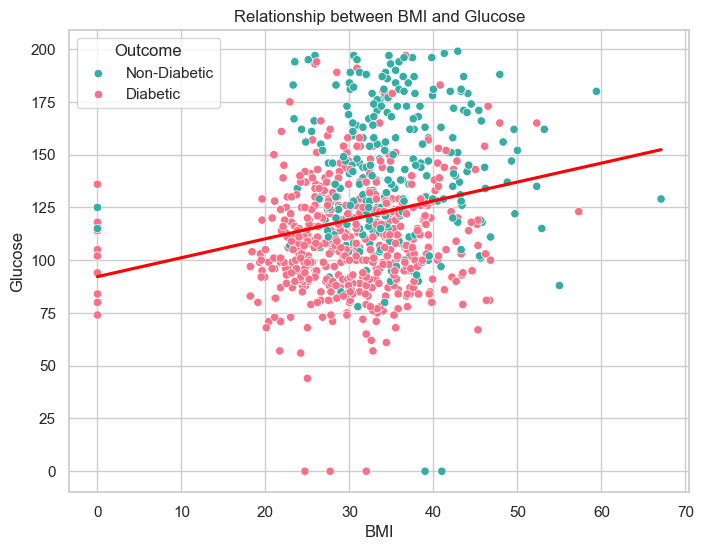

Average BMI for Diabetic: 35.14
Average BMI for Non-Diabetic: 30.30
Average Glucose for Diabetic: 141.26
Average Glucose for Non-Diabetic: 109.98


In [ ]:
# 2. Explore interactions between features:
#BMI vs Glucose 
plt.figure(figsize=(8, 6))
sns.scatterplot(x="BMI", y="Glucose", hue="Outcome", data=diabetes_data, palette="husl")
sns.regplot(x="BMI", y="Glucose", data=diabetes_data, scatter=False, color="red", ci=None)
plt.title("Relationship between BMI and Glucose")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend(title="Outcome", labels=["Non-Diabetic", "Diabetic"])
plt.show()

#  High glucose levels or BMI have been linked to a higher risk of developing diabetes 
diabetic = diabetes_data[diabetes_data["Outcome"] == 1]
non_diabetic = diabetes_data[diabetes_data["Outcome"] == 0]


mean_bmi_diabetic = diabetic["BMI"].mean()
mean_glucose_diabetic = diabetic["Glucose"].mean()
mean_bmi_non_diabetic = non_diabetic["BMI"].mean()
mean_glucose_non_diabetic = non_diabetic["Glucose"].mean()

print(f"Average BMI for Diabetic: {mean_bmi_diabetic:.2f}")
print(f"Average BMI for Non-Diabetic: {mean_bmi_non_diabetic:.2f}")
print(f"Average Glucose for Diabetic: {mean_glucose_diabetic:.2f}")
print(f"Average Glucose for Non-Diabetic: {mean_glucose_non_diabetic:.2f}")

Correlation between Glucose and Outcome: 0.47
Correlation between BMI and Outcome: 0.29


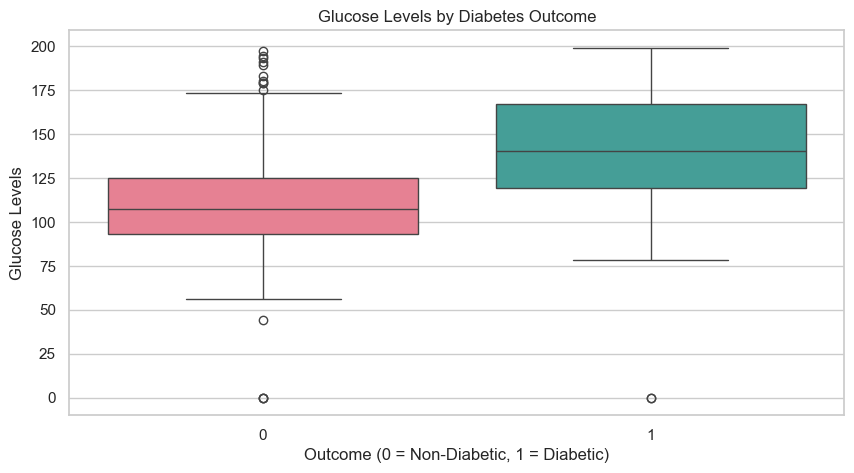

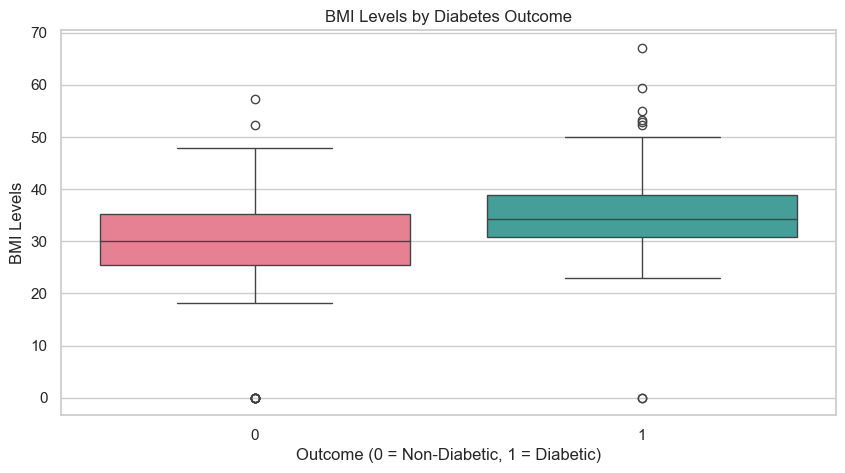

In [ ]:
correlation_glucose = diabetes_data["Glucose"].corr(diabetes_data["Outcome"])  # Pearson by default
correlation_bmi = diabetes_data["BMI"].corr(diabetes_data["Outcome"])

print(f"Correlation between Glucose and Outcome: {correlation_glucose:.2f}")
print(f"Correlation between BMI and Outcome: {correlation_bmi:.2f}")

#Glucose vs Outcome
plt.figure(figsize=(10, 5))
sns.boxplot(data=diabetes_data, x="Outcome", y="Glucose", palette="husl")
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Glucose Levels")
plt.show()

# BMI vs Outcome
plt.figure(figsize=(10, 5))
sns.boxplot(data=diabetes_data, x="Outcome", y="BMI", palette="husl")
plt.title("BMI Levels by Diabetes Outcome")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("BMI Levels")
plt.show()

In [9]:
#1. Binning Techniques:
from sklearn.preprocessing import KBinsDiscretizer

# Equi-Width Binning (for Age)
diabetes_data['Age_Width_Binned'] = pd.cut(diabetes_data['Age'], bins=5, labels=False)
# Equi-Depth Binning (for BMI)
equi_depth = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
diabetes_data['BMI_Depth_Binned'] = equi_depth.fit_transform(diabetes_data[['BMI']])

print("Sample of Age Equi-Width Binning:\n", diabetes_data[['Age', 'Age_Width_Binned']].head())
print("Sample of BMI Equi-Depth Binning:\n", diabetes_data[['BMI', 'BMI_Depth_Binned']].head())

#2. Normalization Techniques:

Sample of Age Equi-Width Binning:
    Age  Age_Width_Binned
0   50                 2
1   31                 0
2   32                 0
3   21                 0
4   33                 0
Sample of BMI Equi-Depth Binning:
     BMI  BMI_Depth_Binned
0  33.6               2.0
1  26.6               1.0
2  23.3               0.0
3  28.1               1.0
4  43.1               4.0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diabetes_data[['Glucose_MinMax', 'BMI_MinMax', 'BloodPressure_MinMax']] = scaler.fit_transform(
    diabetes_data[['Glucose', 'BMI', 'BloodPressure']])

In [11]:
# Log transformation:
import numpy as np

diabetes_data['Glucose_Log'] = np.log1p(diabetes_data['Glucose'])
diabetes_data['BMI_Log'] = np.log1p(diabetes_data['BMI'])
diabetes_data['BloodPressure_Log'] = np.log1p(diabetes_data['BloodPressure'])

In [12]:
#Z-Score Normalization
from scipy.stats import zscore
diabetes_data['Glucose_Z'] = zscore(diabetes_data['Glucose'])
diabetes_data['BMI_Z'] = zscore(diabetes_data['BMI'])
diabetes_data['BloodPressure_Z'] = zscore(diabetes_data['BloodPressure'])

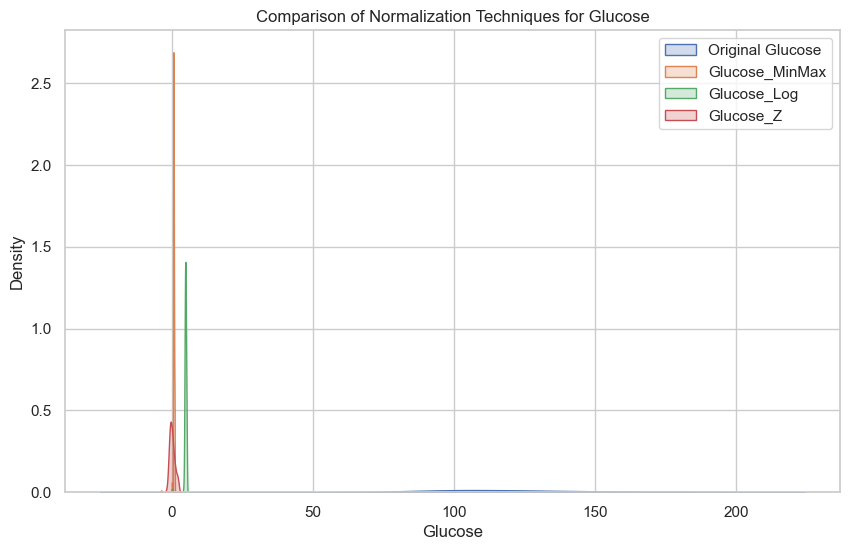

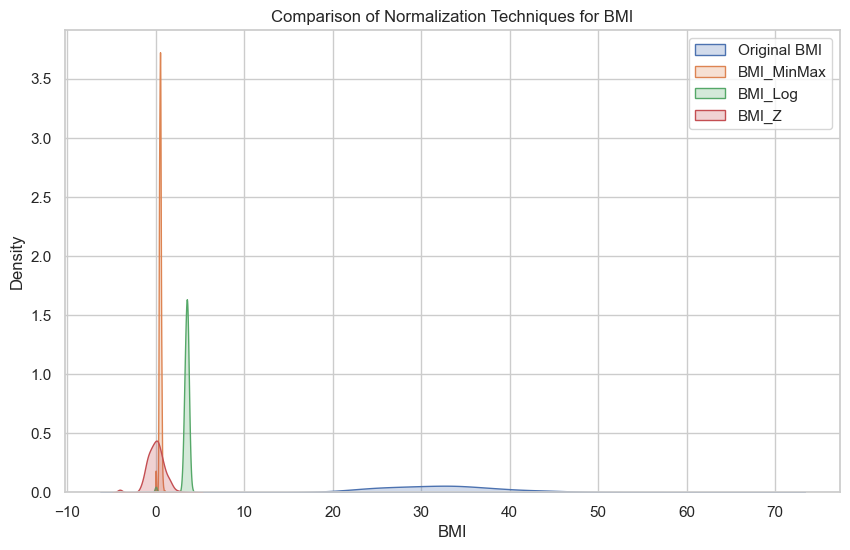

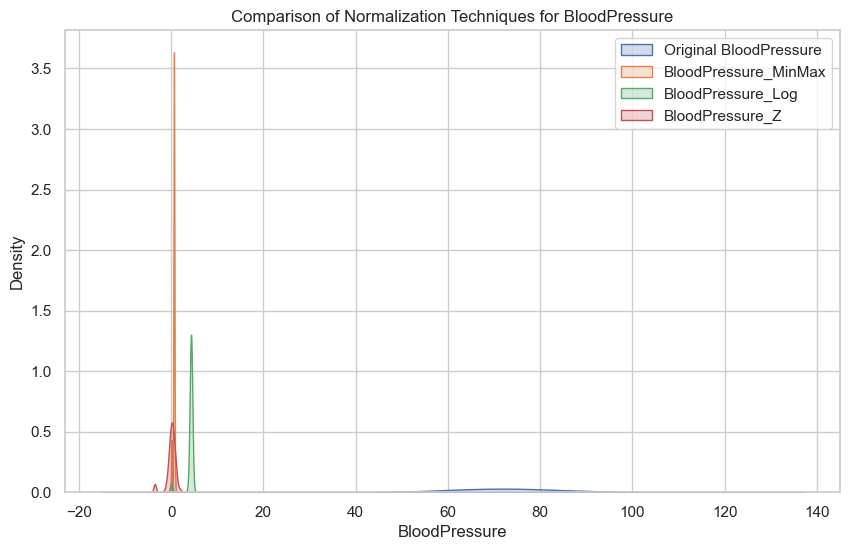

In [13]:
#Compare Discounts Using Density Plots:
attributes = ['Glucose', 'BMI', 'BloodPressure']
methods = ['MinMax', 'Log', 'Z']

for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(diabetes_data[attribute], label=f'Original {attribute}', shade=True)
    for method in methods:
        sns.kdeplot(diabetes_data[f'{attribute}_{method}'], label=f'{attribute}_{method}', shade=True)
    plt.title(f'Comparison of Normalization Techniques for {attribute}')
    plt.legend()
    plt.show()

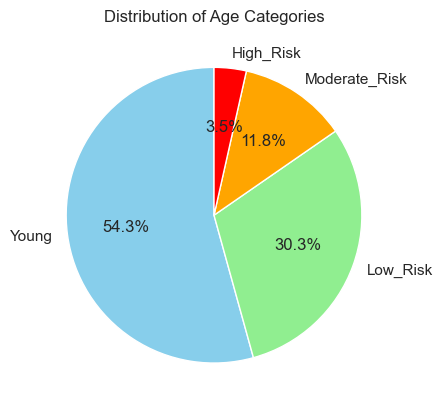

In [ ]:
bins = [18, 30, 45, 60, np.inf]
labels = ['Young', 'Low_Risk', 'Moderate_Risk', 'High_Risk']
diabetes_data['Age_Category'] = pd.cut(diabetes_data['Age'], bins=bins, labels=labels)

diabetes_data['Age_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'red'])
plt.title('Distribution of Age Categories')
plt.ylabel('')  
plt.show()

In [15]:
# 4.Handling Missing Data:
# Mean/Median Imputation
diabetes_data['Insulin_Filled_Mean'] = diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].mean())
diabetes_data['SkinThickness_Filled_Median'] = diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median())
#K-Nearest Neighbors (KNN) imputation
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(diabetes_data[['Insulin', 'SkinThickness']])
diabetes_data['Insulin_Filled_KNN'], diabetes_data['SkinThickness_Filled_KNN'] = imputed_data[:, 0], imputed_data[:, 1]
# المقارنه
print("Statistics for Insulin with Mean Imputation:")
print(diabetes_data['Insulin_Filled_Mean'].describe())
print("\nStatistics for Insulin with KNN Imputation:")
print(diabetes_data['Insulin_Filled_KNN'].describe())

Statistics for Insulin with Mean Imputation:
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin_Filled_Mean, dtype: float64

Statistics for Insulin with KNN Imputation:
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin_Filled_KNN, dtype: float64


Correlation between Age and BMI: 0.04


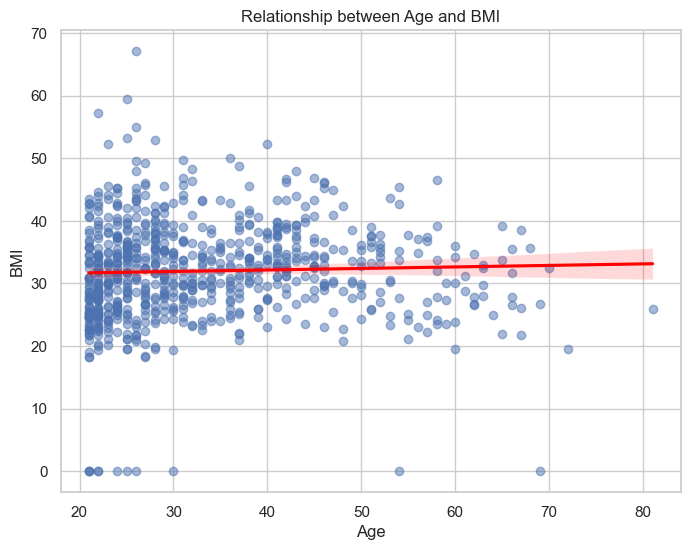

In [16]:
# 5. Feature Engineering:

bins = [0, 18.5, 25, 30, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
diabetes_data['BMI_Category'] = pd.cut(diabetes_data['BMI'], bins=bins, labels=labels, right=False)

# One-Hot Encoding
bmi_encoded = pd.get_dummies(diabetes_data['BMI_Category'], prefix='BMI')
diabetes_data = pd.concat([diabetes_data, bmi_encoded], axis=1)
# Correlation between Age and BMI
correlation_age_bmi = diabetes_data['Age'].corr(diabetes_data['BMI'])
print(f"Correlation between Age and BMI: {correlation_age_bmi:.2f}")
# رسم Scatter Plot مع خط انحدار
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='BMI', data=diabetes_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()